Accuracy vs Confidence plot

Not completely sure, but one possible way to generate the accuracy Vs confidence curve is to
1. Take a sample of test inputs
2. Pass it into model for prediction
3. Get average confidence (using the max function below)
4. Get accuracy between prediction and test set
5. Repeat for more samples until you can plot curve

[Reference](https://arxiv.org/pdf/1802.04865.pdf)

In [ ]:
# max(prediction[9]) # apparently this is defined as confidence by the paper??

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import os
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import os
import pickle
import random

import load_data
import models

Using TensorFlow backend.


In [2]:
print("notMNIST")
notMNIST_X_train, notMNIST_Y_train, notMNIST_X_val, notMNIST_Y_val, notMNIST_X_test, notMNIST_Y_test = load_data.data_notMNIST()
print("MNIST")
MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test = load_data.data_MNIST()

notMNIST
20000 train samples
1000 valid samples
1000 test samples
MNIST
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [5]:
# Create samples of data
X_train, Y_train = Ensembling_Data(20, MNIST_X_train, MNIST_Y_train)
pred_=[]; acc_=[]
for i in range(len(X_train)):
    pred, acc = models.MLP(X_train[i], Y_train[i], MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test)
    pred_.append(pred); acc_.append(acc)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
W0212 00:25:17.141946 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:29: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



Without Dropout, Vanilla MLP


W0212 00:25:19.379404 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:42: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 00:25:19.383598 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:48: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0212 00:25:19.492512 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:79: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

W0212 00:25:19.500962 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0212 00:25:19.736623 140388563654400 module_wrapper.py:139] From /home/root/adversarial/Gal/models.py:95: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_vari

Epoch:0 | Train loss: 64.03 | Train acc: 0.710 | Test acc:0.711
Epoch:1 | Train loss: 61.95 | Train acc: 0.783 | Test acc:0.788
Epoch:2 | Train loss: 60.06 | Train acc: 0.837 | Test acc:0.834
Epoch:3 | Train loss: 58.26 | Train acc: 0.841 | Test acc:0.835
Epoch:4 | Train loss: 56.54 | Train acc: 0.826 | Test acc:0.814
Epoch:5 | Train loss: 54.87 | Train acc: 0.894 | Test acc:0.871
Epoch:6 | Train loss: 53.27 | Train acc: 0.910 | Test acc:0.884
Epoch:7 | Train loss: 51.72 | Train acc: 0.921 | Test acc:0.883
Epoch:8 | Train loss: 50.22 | Train acc: 0.926 | Test acc:0.895
Epoch:9 | Train loss: 48.77 | Train acc: 0.930 | Test acc:0.892
Epoch:10 | Train loss: 47.36 | Train acc: 0.948 | Test acc:0.906
Epoch:11 | Train loss: 45.99 | Train acc: 0.956 | Test acc:0.914
Epoch:12 | Train loss: 44.68 | Train acc: 0.960 | Test acc:0.910
Epoch:13 | Train loss: 43.40 | Train acc: 0.964 | Test acc:0.913
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 58.82 | Train acc: 0.678 | Test acc:0.690
Epoch:1 | Train loss: 56.77 | Train acc: 0.750 | Test acc:0.743
Epoch:2 | Train loss: 54.96 | Train acc: 0.819 | Test acc:0.812
Epoch:3 | Train loss: 53.25 | Train acc: 0.841 | Test acc:0.829
Epoch:4 | Train loss: 51.61 | Train acc: 0.888 | Test acc:0.867
Epoch:5 | Train loss: 50.03 | Train acc: 0.885 | Test acc:0.861
Epoch:6 | Train loss: 48.51 | Train acc: 0.870 | Test acc:0.845
Epoch:7 | Train loss: 47.05 | Train acc: 0.863 | Test acc:0.824
Epoch:8 | Train loss: 45.63 | Train acc: 0.918 | Test acc:0.888
Epoch:9 | Train loss: 44.26 | Train acc: 0.927 | Test acc:0.888
Epoch:10 | Train loss: 42.93 | Train acc: 0.958 | Test acc:0.911
Epoch:11 | Train loss: 41.65 | Train acc: 0.962 | Test acc:0.911
Epoch:12 | Train loss: 40.41 | Train acc: 0.968 | Test acc:0.910
Epoch:13 | Train loss: 39.21 | Train acc: 0.966 | Test acc:0.911
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 51.72 | Train acc: 0.725 | Test acc:0.746
Epoch:1 | Train loss: 49.80 | Train acc: 0.798 | Test acc:0.796
Epoch:2 | Train loss: 48.11 | Train acc: 0.869 | Test acc:0.857
Epoch:3 | Train loss: 46.51 | Train acc: 0.886 | Test acc:0.868
Epoch:4 | Train loss: 44.98 | Train acc: 0.914 | Test acc:0.889
Epoch:5 | Train loss: 43.52 | Train acc: 0.914 | Test acc:0.887
Epoch:6 | Train loss: 42.10 | Train acc: 0.928 | Test acc:0.894
Epoch:7 | Train loss: 40.74 | Train acc: 0.942 | Test acc:0.904
Epoch:8 | Train loss: 39.43 | Train acc: 0.950 | Test acc:0.907
Epoch:9 | Train loss: 38.17 | Train acc: 0.957 | Test acc:0.911
Epoch:10 | Train loss: 36.95 | Train acc: 0.960 | Test acc:0.910
Epoch:11 | Train loss: 35.78 | Train acc: 0.965 | Test acc:0.914
Epoch:12 | Train loss: 34.65 | Train acc: 0.968 | Test acc:0.915
Epoch:13 | Train loss: 33.55 | Train acc: 0.972 | Test acc:0.914
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 63.99 | Train acc: 0.737 | Test acc:0.726
Epoch:1 | Train loss: 61.84 | Train acc: 0.833 | Test acc:0.822
Epoch:2 | Train loss: 59.92 | Train acc: 0.862 | Test acc:0.843
Epoch:3 | Train loss: 58.11 | Train acc: 0.904 | Test acc:0.884
Epoch:4 | Train loss: 56.36 | Train acc: 0.911 | Test acc:0.888
Epoch:5 | Train loss: 54.68 | Train acc: 0.918 | Test acc:0.892
Epoch:6 | Train loss: 53.05 | Train acc: 0.928 | Test acc:0.901
Epoch:7 | Train loss: 51.47 | Train acc: 0.937 | Test acc:0.904
Epoch:8 | Train loss: 49.96 | Train acc: 0.943 | Test acc:0.906
Epoch:9 | Train loss: 48.49 | Train acc: 0.948 | Test acc:0.907
Epoch:10 | Train loss: 47.06 | Train acc: 0.952 | Test acc:0.909
Epoch:11 | Train loss: 45.68 | Train acc: 0.959 | Test acc:0.913
Epoch:12 | Train loss: 44.35 | Train acc: 0.961 | Test acc:0.911
Epoch:13 | Train loss: 43.06 | Train acc: 0.960 | Test acc:0.907
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 62.86 | Train acc: 0.701 | Test acc:0.703
Epoch:1 | Train loss: 60.75 | Train acc: 0.784 | Test acc:0.785
Epoch:2 | Train loss: 58.87 | Train acc: 0.851 | Test acc:0.841
Epoch:3 | Train loss: 57.08 | Train acc: 0.887 | Test acc:0.870
Epoch:4 | Train loss: 55.37 | Train acc: 0.898 | Test acc:0.870
Epoch:5 | Train loss: 53.73 | Train acc: 0.897 | Test acc:0.873
Epoch:6 | Train loss: 52.13 | Train acc: 0.916 | Test acc:0.889
Epoch:7 | Train loss: 50.59 | Train acc: 0.930 | Test acc:0.894
Epoch:8 | Train loss: 49.10 | Train acc: 0.934 | Test acc:0.895
Epoch:9 | Train loss: 47.66 | Train acc: 0.950 | Test acc:0.906
Epoch:10 | Train loss: 46.27 | Train acc: 0.958 | Test acc:0.909
Epoch:11 | Train loss: 44.92 | Train acc: 0.963 | Test acc:0.912
Epoch:12 | Train loss: 43.61 | Train acc: 0.965 | Test acc:0.908
Epoch:13 | Train loss: 42.34 | Train acc: 0.972 | Test acc:0.916
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 64.49 | Train acc: 0.765 | Test acc:0.769
Epoch:1 | Train loss: 62.29 | Train acc: 0.822 | Test acc:0.806
Epoch:2 | Train loss: 60.34 | Train acc: 0.872 | Test acc:0.860
Epoch:3 | Train loss: 58.49 | Train acc: 0.894 | Test acc:0.874
Epoch:4 | Train loss: 56.71 | Train acc: 0.864 | Test acc:0.834
Epoch:5 | Train loss: 55.00 | Train acc: 0.876 | Test acc:0.843
Epoch:6 | Train loss: 53.35 | Train acc: 0.892 | Test acc:0.859
Epoch:7 | Train loss: 51.75 | Train acc: 0.898 | Test acc:0.859
Epoch:8 | Train loss: 50.21 | Train acc: 0.909 | Test acc:0.866
Epoch:9 | Train loss: 48.71 | Train acc: 0.926 | Test acc:0.887
Epoch:10 | Train loss: 47.26 | Train acc: 0.947 | Test acc:0.904
Epoch:11 | Train loss: 45.86 | Train acc: 0.954 | Test acc:0.907
Epoch:12 | Train loss: 44.50 | Train acc: 0.960 | Test acc:0.914
Epoch:13 | Train loss: 43.18 | Train acc: 0.962 | Test acc:0.916
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 61.00 | Train acc: 0.732 | Test acc:0.723
Epoch:1 | Train loss: 58.92 | Train acc: 0.807 | Test acc:0.780
Epoch:2 | Train loss: 57.05 | Train acc: 0.878 | Test acc:0.859
Epoch:3 | Train loss: 55.26 | Train acc: 0.892 | Test acc:0.865
Epoch:4 | Train loss: 53.57 | Train acc: 0.852 | Test acc:0.822
Epoch:5 | Train loss: 51.91 | Train acc: 0.900 | Test acc:0.863
Epoch:6 | Train loss: 50.33 | Train acc: 0.908 | Test acc:0.866
Epoch:7 | Train loss: 48.79 | Train acc: 0.910 | Test acc:0.871
Epoch:8 | Train loss: 47.31 | Train acc: 0.934 | Test acc:0.892
Epoch:9 | Train loss: 45.87 | Train acc: 0.946 | Test acc:0.900
Epoch:10 | Train loss: 44.49 | Train acc: 0.956 | Test acc:0.908
Epoch:11 | Train loss: 43.15 | Train acc: 0.955 | Test acc:0.908
Epoch:12 | Train loss: 41.85 | Train acc: 0.962 | Test acc:0.914
Epoch:13 | Train loss: 40.59 | Train acc: 0.968 | Test acc:0.912
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 56.59 | Train acc: 0.698 | Test acc:0.684
Epoch:1 | Train loss: 54.56 | Train acc: 0.821 | Test acc:0.800
Epoch:2 | Train loss: 52.78 | Train acc: 0.859 | Test acc:0.837
Epoch:3 | Train loss: 51.08 | Train acc: 0.886 | Test acc:0.865
Epoch:4 | Train loss: 49.47 | Train acc: 0.901 | Test acc:0.878
Epoch:5 | Train loss: 47.91 | Train acc: 0.932 | Test acc:0.900
Epoch:6 | Train loss: 46.41 | Train acc: 0.946 | Test acc:0.904
Epoch:7 | Train loss: 44.96 | Train acc: 0.948 | Test acc:0.909
Epoch:8 | Train loss: 43.58 | Train acc: 0.946 | Test acc:0.903
Epoch:9 | Train loss: 42.23 | Train acc: 0.955 | Test acc:0.908
Epoch:10 | Train loss: 40.93 | Train acc: 0.962 | Test acc:0.910
Epoch:11 | Train loss: 39.68 | Train acc: 0.964 | Test acc:0.913
Epoch:12 | Train loss: 38.47 | Train acc: 0.965 | Test acc:0.915
Epoch:13 | Train loss: 37.30 | Train acc: 0.967 | Test acc:0.916
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 58.02 | Train acc: 0.739 | Test acc:0.732
Epoch:1 | Train loss: 55.96 | Train acc: 0.829 | Test acc:0.823
Epoch:2 | Train loss: 54.13 | Train acc: 0.827 | Test acc:0.812
Epoch:3 | Train loss: 52.39 | Train acc: 0.882 | Test acc:0.870
Epoch:4 | Train loss: 50.72 | Train acc: 0.913 | Test acc:0.895
Epoch:5 | Train loss: 49.12 | Train acc: 0.920 | Test acc:0.896
Epoch:6 | Train loss: 47.58 | Train acc: 0.934 | Test acc:0.903
Epoch:7 | Train loss: 46.09 | Train acc: 0.946 | Test acc:0.914
Epoch:8 | Train loss: 44.65 | Train acc: 0.956 | Test acc:0.915
Epoch:9 | Train loss: 43.27 | Train acc: 0.960 | Test acc:0.913
Epoch:10 | Train loss: 41.93 | Train acc: 0.964 | Test acc:0.918
Epoch:11 | Train loss: 40.63 | Train acc: 0.967 | Test acc:0.919
Epoch:12 | Train loss: 39.38 | Train acc: 0.971 | Test acc:0.921
Epoch:13 | Train loss: 38.16 | Train acc: 0.974 | Test acc:0.923
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 59.00 | Train acc: 0.674 | Test acc:0.663
Epoch:1 | Train loss: 56.94 | Train acc: 0.794 | Test acc:0.782
Epoch:2 | Train loss: 55.10 | Train acc: 0.865 | Test acc:0.850
Epoch:3 | Train loss: 53.37 | Train acc: 0.882 | Test acc:0.864
Epoch:4 | Train loss: 51.71 | Train acc: 0.896 | Test acc:0.875
Epoch:5 | Train loss: 50.11 | Train acc: 0.904 | Test acc:0.876
Epoch:6 | Train loss: 48.56 | Train acc: 0.917 | Test acc:0.889
Epoch:7 | Train loss: 47.06 | Train acc: 0.930 | Test acc:0.890
Epoch:8 | Train loss: 45.62 | Train acc: 0.938 | Test acc:0.904
Epoch:9 | Train loss: 44.23 | Train acc: 0.939 | Test acc:0.899
Epoch:10 | Train loss: 42.88 | Train acc: 0.949 | Test acc:0.908
Epoch:11 | Train loss: 41.58 | Train acc: 0.952 | Test acc:0.903
Epoch:12 | Train loss: 40.32 | Train acc: 0.958 | Test acc:0.908
Epoch:13 | Train loss: 39.10 | Train acc: 0.959 | Test acc:0.909
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 60.56 | Train acc: 0.728 | Test acc:0.726
Epoch:1 | Train loss: 58.55 | Train acc: 0.809 | Test acc:0.805
Epoch:2 | Train loss: 56.74 | Train acc: 0.850 | Test acc:0.844
Epoch:3 | Train loss: 55.03 | Train acc: 0.878 | Test acc:0.866
Epoch:4 | Train loss: 53.39 | Train acc: 0.903 | Test acc:0.880
Epoch:5 | Train loss: 51.81 | Train acc: 0.922 | Test acc:0.888
Epoch:6 | Train loss: 50.29 | Train acc: 0.938 | Test acc:0.898
Epoch:7 | Train loss: 48.83 | Train acc: 0.941 | Test acc:0.902
Epoch:8 | Train loss: 47.40 | Train acc: 0.946 | Test acc:0.910
Epoch:9 | Train loss: 46.03 | Train acc: 0.952 | Test acc:0.909
Epoch:10 | Train loss: 44.71 | Train acc: 0.958 | Test acc:0.914
Epoch:11 | Train loss: 43.42 | Train acc: 0.965 | Test acc:0.913
Epoch:12 | Train loss: 42.18 | Train acc: 0.966 | Test acc:0.914
Epoch:13 | Train loss: 40.97 | Train acc: 0.971 | Test acc:0.915
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 60.55 | Train acc: 0.764 | Test acc:0.765
Epoch:1 | Train loss: 58.52 | Train acc: 0.776 | Test acc:0.778
Epoch:2 | Train loss: 56.67 | Train acc: 0.854 | Test acc:0.854
Epoch:3 | Train loss: 54.92 | Train acc: 0.849 | Test acc:0.840
Epoch:4 | Train loss: 53.23 | Train acc: 0.906 | Test acc:0.887
Epoch:5 | Train loss: 51.61 | Train acc: 0.912 | Test acc:0.891
Epoch:6 | Train loss: 50.05 | Train acc: 0.921 | Test acc:0.890
Epoch:7 | Train loss: 48.54 | Train acc: 0.942 | Test acc:0.902
Epoch:8 | Train loss: 47.07 | Train acc: 0.947 | Test acc:0.908
Epoch:9 | Train loss: 45.66 | Train acc: 0.951 | Test acc:0.908
Epoch:10 | Train loss: 44.30 | Train acc: 0.958 | Test acc:0.908
Epoch:11 | Train loss: 42.98 | Train acc: 0.961 | Test acc:0.915
Epoch:12 | Train loss: 41.71 | Train acc: 0.966 | Test acc:0.916
Epoch:13 | Train loss: 40.48 | Train acc: 0.969 | Test acc:0.918
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 60.68 | Train acc: 0.687 | Test acc:0.678
Epoch:1 | Train loss: 58.60 | Train acc: 0.811 | Test acc:0.811
Epoch:2 | Train loss: 56.73 | Train acc: 0.850 | Test acc:0.844
Epoch:3 | Train loss: 54.97 | Train acc: 0.879 | Test acc:0.856
Epoch:4 | Train loss: 53.27 | Train acc: 0.906 | Test acc:0.880
Epoch:5 | Train loss: 51.65 | Train acc: 0.921 | Test acc:0.887
Epoch:6 | Train loss: 50.07 | Train acc: 0.930 | Test acc:0.895
Epoch:7 | Train loss: 48.55 | Train acc: 0.946 | Test acc:0.904
Epoch:8 | Train loss: 47.09 | Train acc: 0.954 | Test acc:0.903
Epoch:9 | Train loss: 45.67 | Train acc: 0.963 | Test acc:0.909
Epoch:10 | Train loss: 44.31 | Train acc: 0.964 | Test acc:0.910
Epoch:11 | Train loss: 42.99 | Train acc: 0.966 | Test acc:0.910
Epoch:12 | Train loss: 41.71 | Train acc: 0.966 | Test acc:0.910
Epoch:13 | Train loss: 40.47 | Train acc: 0.970 | Test acc:0.912
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 63.48 | Train acc: 0.765 | Test acc:0.749
Epoch:1 | Train loss: 61.30 | Train acc: 0.827 | Test acc:0.813
Epoch:2 | Train loss: 59.36 | Train acc: 0.862 | Test acc:0.841
Epoch:3 | Train loss: 57.51 | Train acc: 0.896 | Test acc:0.876
Epoch:4 | Train loss: 55.74 | Train acc: 0.904 | Test acc:0.881
Epoch:5 | Train loss: 54.03 | Train acc: 0.927 | Test acc:0.897
Epoch:6 | Train loss: 52.38 | Train acc: 0.933 | Test acc:0.901
Epoch:7 | Train loss: 50.79 | Train acc: 0.945 | Test acc:0.904
Epoch:8 | Train loss: 49.24 | Train acc: 0.954 | Test acc:0.910
Epoch:9 | Train loss: 47.76 | Train acc: 0.952 | Test acc:0.913
Epoch:10 | Train loss: 46.31 | Train acc: 0.961 | Test acc:0.912
Epoch:11 | Train loss: 44.92 | Train acc: 0.960 | Test acc:0.911
Epoch:12 | Train loss: 43.56 | Train acc: 0.966 | Test acc:0.917
Epoch:13 | Train loss: 42.26 | Train acc: 0.970 | Test acc:0.918
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 63.29 | Train acc: 0.649 | Test acc:0.648
Epoch:1 | Train loss: 61.22 | Train acc: 0.799 | Test acc:0.800
Epoch:2 | Train loss: 59.37 | Train acc: 0.852 | Test acc:0.845
Epoch:3 | Train loss: 57.60 | Train acc: 0.881 | Test acc:0.868
Epoch:4 | Train loss: 55.91 | Train acc: 0.908 | Test acc:0.884
Epoch:5 | Train loss: 54.28 | Train acc: 0.916 | Test acc:0.891
Epoch:6 | Train loss: 52.71 | Train acc: 0.920 | Test acc:0.893
Epoch:7 | Train loss: 51.19 | Train acc: 0.931 | Test acc:0.897
Epoch:8 | Train loss: 49.72 | Train acc: 0.944 | Test acc:0.904
Epoch:9 | Train loss: 48.30 | Train acc: 0.949 | Test acc:0.908
Epoch:10 | Train loss: 46.93 | Train acc: 0.952 | Test acc:0.907
Epoch:11 | Train loss: 45.60 | Train acc: 0.959 | Test acc:0.908
Epoch:12 | Train loss: 44.31 | Train acc: 0.960 | Test acc:0.912
Epoch:13 | Train loss: 43.07 | Train acc: 0.964 | Test acc:0.913
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 56.46 | Train acc: 0.664 | Test acc:0.627
Epoch:1 | Train loss: 54.45 | Train acc: 0.768 | Test acc:0.734
Epoch:2 | Train loss: 52.67 | Train acc: 0.848 | Test acc:0.818
Epoch:3 | Train loss: 51.00 | Train acc: 0.883 | Test acc:0.858
Epoch:4 | Train loss: 49.39 | Train acc: 0.900 | Test acc:0.865
Epoch:5 | Train loss: 47.86 | Train acc: 0.895 | Test acc:0.856
Epoch:6 | Train loss: 46.35 | Train acc: 0.937 | Test acc:0.899
Epoch:7 | Train loss: 44.92 | Train acc: 0.938 | Test acc:0.898
Epoch:8 | Train loss: 43.53 | Train acc: 0.950 | Test acc:0.905
Epoch:9 | Train loss: 42.19 | Train acc: 0.953 | Test acc:0.905
Epoch:10 | Train loss: 40.90 | Train acc: 0.964 | Test acc:0.911
Epoch:11 | Train loss: 39.65 | Train acc: 0.967 | Test acc:0.914
Epoch:12 | Train loss: 38.44 | Train acc: 0.970 | Test acc:0.913
Epoch:13 | Train loss: 37.27 | Train acc: 0.973 | Test acc:0.912
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 56.44 | Train acc: 0.738 | Test acc:0.738
Epoch:1 | Train loss: 54.42 | Train acc: 0.782 | Test acc:0.766
Epoch:2 | Train loss: 52.65 | Train acc: 0.843 | Test acc:0.832
Epoch:3 | Train loss: 50.96 | Train acc: 0.893 | Test acc:0.876
Epoch:4 | Train loss: 49.35 | Train acc: 0.895 | Test acc:0.875
Epoch:5 | Train loss: 47.80 | Train acc: 0.924 | Test acc:0.890
Epoch:6 | Train loss: 46.31 | Train acc: 0.934 | Test acc:0.902
Epoch:7 | Train loss: 44.88 | Train acc: 0.940 | Test acc:0.903
Epoch:8 | Train loss: 43.49 | Train acc: 0.950 | Test acc:0.909
Epoch:9 | Train loss: 42.15 | Train acc: 0.952 | Test acc:0.912
Epoch:10 | Train loss: 40.86 | Train acc: 0.960 | Test acc:0.911
Epoch:11 | Train loss: 39.61 | Train acc: 0.964 | Test acc:0.920
Epoch:12 | Train loss: 38.40 | Train acc: 0.967 | Test acc:0.919
Epoch:13 | Train loss: 37.23 | Train acc: 0.972 | Test acc:0.918
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 53.61 | Train acc: 0.725 | Test acc:0.718
Epoch:1 | Train loss: 51.66 | Train acc: 0.850 | Test acc:0.836
Epoch:2 | Train loss: 49.92 | Train acc: 0.884 | Test acc:0.858
Epoch:3 | Train loss: 48.31 | Train acc: 0.875 | Test acc:0.848
Epoch:4 | Train loss: 46.73 | Train acc: 0.914 | Test acc:0.887
Epoch:5 | Train loss: 45.22 | Train acc: 0.922 | Test acc:0.892
Epoch:6 | Train loss: 43.77 | Train acc: 0.935 | Test acc:0.897
Epoch:7 | Train loss: 42.38 | Train acc: 0.941 | Test acc:0.897
Epoch:8 | Train loss: 41.03 | Train acc: 0.935 | Test acc:0.896
Epoch:9 | Train loss: 39.73 | Train acc: 0.948 | Test acc:0.899
Epoch:10 | Train loss: 38.48 | Train acc: 0.952 | Test acc:0.901
Epoch:11 | Train loss: 37.26 | Train acc: 0.961 | Test acc:0.909
Epoch:12 | Train loss: 36.09 | Train acc: 0.963 | Test acc:0.907
Epoch:13 | Train loss: 34.96 | Train acc: 0.965 | Test acc:0.910
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 62.59 | Train acc: 0.730 | Test acc:0.731
Epoch:1 | Train loss: 60.52 | Train acc: 0.811 | Test acc:0.819
Epoch:2 | Train loss: 58.68 | Train acc: 0.870 | Test acc:0.872
Epoch:3 | Train loss: 56.96 | Train acc: 0.874 | Test acc:0.872
Epoch:4 | Train loss: 55.29 | Train acc: 0.912 | Test acc:0.892
Epoch:5 | Train loss: 53.69 | Train acc: 0.920 | Test acc:0.896
Epoch:6 | Train loss: 52.14 | Train acc: 0.920 | Test acc:0.899
Epoch:7 | Train loss: 50.64 | Train acc: 0.941 | Test acc:0.909
Epoch:8 | Train loss: 49.21 | Train acc: 0.939 | Test acc:0.903
Epoch:9 | Train loss: 47.80 | Train acc: 0.952 | Test acc:0.911
Epoch:10 | Train loss: 46.46 | Train acc: 0.950 | Test acc:0.901
Epoch:11 | Train loss: 45.14 | Train acc: 0.962 | Test acc:0.916
Epoch:12 | Train loss: 43.88 | Train acc: 0.962 | Test acc:0.912
Epoch:13 | Train loss: 42.65 | Train acc: 0.966 | Test acc:0.915
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 57.99 | Train acc: 0.678 | Test acc:0.676
Epoch:1 | Train loss: 56.00 | Train acc: 0.806 | Test acc:0.800
Epoch:2 | Train loss: 54.20 | Train acc: 0.855 | Test acc:0.844
Epoch:3 | Train loss: 52.50 | Train acc: 0.874 | Test acc:0.855
Epoch:4 | Train loss: 50.88 | Train acc: 0.860 | Test acc:0.845
Epoch:5 | Train loss: 49.31 | Train acc: 0.895 | Test acc:0.868
Epoch:6 | Train loss: 47.80 | Train acc: 0.918 | Test acc:0.881
Epoch:7 | Train loss: 46.34 | Train acc: 0.926 | Test acc:0.885
Epoch:8 | Train loss: 44.93 | Train acc: 0.940 | Test acc:0.900
Epoch:9 | Train loss: 43.57 | Train acc: 0.953 | Test acc:0.909
Epoch:10 | Train loss: 42.26 | Train acc: 0.956 | Test acc:0.908
Epoch:11 | Train loss: 40.99 | Train acc: 0.956 | Test acc:0.908
Epoch:12 | Train loss: 39.75 | Train acc: 0.960 | Test acc:0.909
Epoch:13 | Train loss: 38.57 | Train acc: 0.962 | Test acc:0.906


In [11]:
len(acc_)

20

In [12]:
len(pred_[0])

confi_list=[]
for item in pred_:
    tmplist=[]
    for array in item:
        confidence = max(array) # apparently this is defined as confidence by the paper??
        tmplist.append(confidence)
    confi_list.append(pd.Series(tmplist).mean())

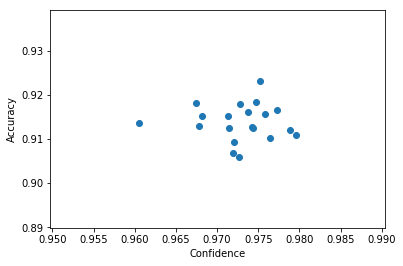

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(confi_list, acc_)
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

In [4]:
def Ensembling_Data(M, MNIST_X_train, MNIST_Y_train):
#     M = 5
    sampled_indices = np.arange(0,MNIST_X_train.shape[0])
    random.shuffle(sampled_indices)

    cut = int(MNIST_X_train.shape[0]/M)
    index_sample_list = []
    for i in range(M):
        index_sample_list.append(sampled_indices[cut*i:cut*(i+1)])
        
    training_X_df = []; training_Y_df = []
    for index_range in index_sample_list:
        training_X_df.append(MNIST_X_train[[index_range]])
        training_Y_df.append(MNIST_Y_train[[index_range]])
        
    return training_X_df, training_Y_df

def NLL(pred_values, MNIST_Y_test, index_of_y):

    from keras import backend as K

    # generate NLL distribution
#     pred_hotcoded = np_utils.to_categorical(pred_values, 10)[index_of_y:index_of_y+1]

    # y_test = y_test.astype('float32') # necessary here, since y_pred comes in this type - check in your case with y_test.dtype and y_pred.dtype
    # y_test = K.constant(y_test)
    # y_pred = K.constant(y_pred)

#     y_pred = K.constant(pred_hotcoded)
    
    y_pred = K.constant(pred_values[index_of_y:index_of_y+1])

    g = K.categorical_crossentropy(target=MNIST_Y_test[index_of_y:index_of_y+1], output=y_pred)  # tensor
    ce = K.eval(g)  # 'ce' for cross-entropy
    ce.shape
    # (10000,) # i.e. one loss quantity per sample

    # sum up and divide with the no. of samples:
    log_loss = np.sum(ce)/ce.shape[0]
#     log_loss
    # 0.05165323486328125
    
    # https://stackoverflow.com/questions/52497625/how-to-calculate-negative-log-likelihoog-on-mnist-dataset
    return log_loss

def entropy_values(MNIST_Y_test, prediction):
    entropy_values=[]
    # Note: To obtain results faster, we use 200 samples for testing purposes
    for i in range(len(MNIST_Y_test[0:200])): # WARNING: Remove 100 limit, let whole dataframe!!!
        log_loss = NLL(prediction, MNIST_Y_test, i)
        entropy_values.append(log_loss)
#         print(i)
    #     print(log_loss)
    return entropy_values

# def entropy_values_faster(MNIST_Y_test, prediction):
# #     entropy_values=[]
# #     for i in range(len(MNIST_Y_test[0:])): # WARNING: Remove 100 limit, let whole dataframe!!!
# #         log_loss = NLL(prediction, MNIST_Y_test, i)
# #         entropy_values.append(log_loss)
#     entropy_values = [NLL(prediction, MNIST_Y_test, i) for i in range(len(MNIST_Y_test))]
#     #     print(log_loss)
#     return entropy_values



In [4]:
def ensembling_expt(M, MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test, model_function):
    
    training_X_df, training_Y_df = Ensembling_Data(M, MNIST_X_train, MNIST_Y_train)

    prediction_storage=[]
    for i in range(M):
        X_train = training_X_df[i]
        Y_train = training_Y_df[i]
#         model_function = models.MLP()
#         pred = models.MLP(X_train, Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test)
        pred = model_function(X_train, Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test)
        prediction_storage.append(pred)
        
    avg_predictions_from_ensemble=[]
    for j in range(len(prediction_storage[0])):
        tmpList=[]
        for i in range(M):
            tmpList.append(prediction_storage[i][j])
        pred_avg = np.average(tmpList, axis=0)
        avg_predictions_from_ensemble.append(pred_avg)
        
    avg_predictions_from_ensemble2 = np.array([list(i) for i in avg_predictions_from_ensemble])
    entropy_val = entropy_values(MNIST_Y_test, avg_predictions_from_ensemble2)
    
    return entropy_val

To be tested on both MNIST and notMNIST data for variation in confidence / accuracy